In [1]:
import numpy as np
import pandas as pd
from salesplansuccess.api import SalesPlanSuccess

In [2]:
pd.set_option('display.precision', 2)

### Generation of a random historical sales dataset with downtrend of -15 log% per month but a positive drift of 40 log% every third month at the end of a quarter

In [3]:
sales = np.random.normal(loc = -0.15, scale = 0.22, size=(54,)) + np.tile(np.array([0.0, 0.4, 0.0]), 19)[:-3]

### Applying the ARIMA(2,0,0) model to the random historical sales dataset with AR1 and AR2 coefficients of −0.3 and −0.55 respectively

In [4]:
sales[1] -= 0.3 * sales[0]
for i in range(2, sales.shape[0]):
    sales[i] += -0.55 * sales[i-2] -0.3 * sales[i-1]

### Converting the random logarithmic monthly sales changes into cummulative logarithmic sales changes, then scaling the initial monthly sales to 100.0 and converting from logarithmic to regular sales numbers

In [5]:
sales = np.exp(np.concatenate((np.array([0.0]), sales)).cumsum() + np.log(100.0))

### Creating the historical sales data pandas DataFrame in the format ready to feed into SalesPlanSuccess class

In [6]:
historical_data = pd.DataFrame({'Year': ((np.zeros((5,12),dtype='int64') + 2018) + np.arange(5).reshape(5, 1)).flatten()[:-5], 
                                'Month': np.tile(np.arange(1,13), 5)[:-5], 
                                'Sales': sales})

### Looking at the generated random historical sales dataset

In [7]:
historical_data

,Year,Month,Sales
0,2018,1,100.00
1,2018,2,72.10
2,2018,3,98.56
3,2018,4,79.17
4,2018,5,62.98
5,2018,6,122.95
6,2018,7,125.40
7,2018,8,104.24
8,2018,9,109.66
9,2018,10,157.76


### Creating an object of the class SalesPlanSuccess, feeding into it the historical sales data and annual sales plan for the current year 2022

In [8]:
sps = SalesPlanSuccess(data = historical_data, plan = 3800, product = 'superbumab')

### Processing the fed dataset and estimating the parameters of the ARIMA(2,1,0) model with one external regressor

In [9]:
sps.fit(mode='LSE')

	  Coefficient estimates in LSE
Monthly drift:				-0.081
End of quarter:				 0.361
AR1:					-0.275
AR2:					-0.511
Standard deviation of residuals:	 0.234


### Looking at the estimates of the parameters of the ARIMA(2,1,0) model from the previous step without repeating the fit itself

In [10]:
sps.summary()

	  Coefficient estimates in LSE
Monthly drift:				-0.081
End of quarter:				 0.361
AR1:					-0.275
AR2:					-0.511
Standard deviation of residuals:	 0.234


### A Monte Carlo simulation for the final months of the current year 2022 (or if the dataset had ended with the month 12, then it would have been for the 12 months of the next year 2023)

In [11]:
sps.simulate(sample_size=50000)

Annual plan:				3,800

Probability of achieving this annual plan:	44.2%%

	Percentile table
1st percetile:		3,102
5th percetile:		3,250
10th percetile:		3,344
20th percetile:		3,469
30th percetile:		3,566
40th percetile:		3,656
50th percetile:		3,745
60th percetile:		3,843
70th percetile:		3,954
80th percetile:		4,090
90th percetile:		4,299
95th percetile:		4,493
99th percetile:		4,912



### Looking at the percentile table from the previous step without repeating the simulation

In [12]:
sps.percentiles()

Annual plan:				3,800

Probability of achieving this annual plan:	44.2%%

	Percentile table
1st percetile:		3,102
5th percetile:		3,250
10th percetile:		3,344
20th percetile:		3,469
30th percetile:		3,566
40th percetile:		3,656
50th percetile:		3,745
60th percetile:		3,843
70th percetile:		3,954
80th percetile:		4,090
90th percetile:		4,299
95th percetile:		4,493
99th percetile:		4,912



### On the plot below, the X axis shows the expected annual sales vs. the plan for the current (or next) year according to the Monte Carlo simulation from the previous step

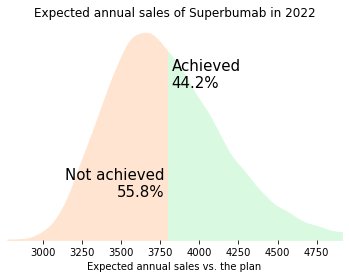

In [13]:
sps.plot(failure_color='#FFE5D1', success_color='#D9FAE0')